In [18]:
!pip install networkx matplotlib numpy pandas

In [19]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import urllib.request

In [20]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/Iranidoust/IUT-Graph-Mining-Course/master/Data%20Sets/Basic/Zachary's%20karate%20club/karate.gml",
    "karate.gml"
)

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/Iranidoust/IUT-Graph-Mining-Course/master/Data%20Sets/Basic/Cora%20Citation%20Network/cora.cites",
    "cora.cites"
)

print("✅ Files downloaded successfully")

G_karate = nx.read_gml("karate.gml")  # Karate network
G_cora = nx.read_edgelist("cora.cites", nodetype=int)  # Cora citation network (undirected)

print("Karate:", G_karate.number_of_nodes(), "nodes,", G_karate.number_of_edges(), "edges")
print("Cora:", G_cora.number_of_nodes(), "nodes,", G_cora.number_of_edges(), "edges")

✅ Files downloaded successfully
Karate: 34 nodes, 78 edges
Cora: 2708 nodes, 5278 edges


<h1>بخش 1 <h1/>


## بخش 1.1 : تعریف سؤالات تحقیقاتی

### شبکه ۱: Zachary’s Karate Club
آیا ساختار شبکه‌ی ارتباطات بین اعضای باشگاه کاراته نشان می‌دهد که برخی از گره‌ها (اعضا) نقش مرکزی و تأثیرگذار دارند؟  

### شبکه ۲: Cora Citation Network
 آیا مقالاتی که همدیگر را ارجاع داده‌اند، تمایل دارند در خوشه‌های موضوعی مشابه قرار بگیرند و به نوعی بازتاب‌ دهنده‌ی ساختار علمی حوزه‌های پژوهشی باشند؟


## بخش 1.2 : تعریف پنج شاخص
- توزیع درجه  
- ضریب خوشه‌بندی  
- طول مسیر میانگین  
- همبستگی درجه  
- تعداد مؤلفه‌های همبند


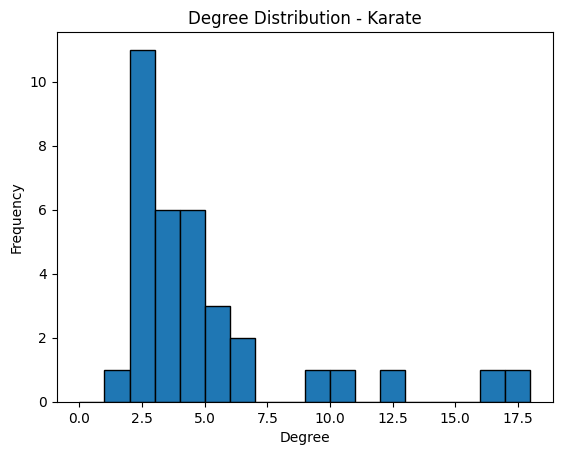

Karate Network Metrics:
Average clustering coefficient: 0.5706384782076823
Average shortest path length: 2.408199643493761
Degree assortativity: -0.47561309768461413
Number of connected components: 1


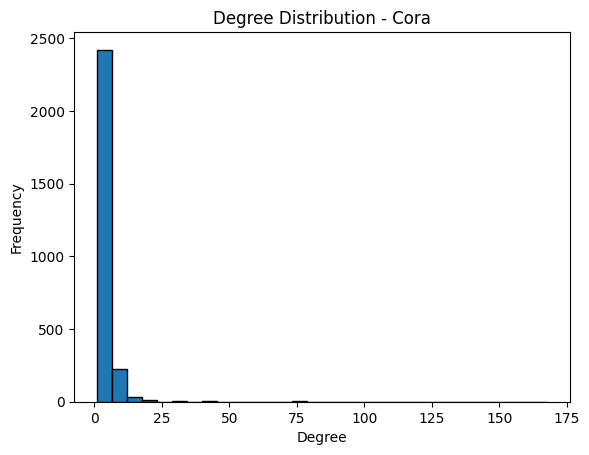

Cora Network Metrics:
Average clustering coefficient: 0.24067329850193736
Average shortest path length: 6.310998681298742
Degree assortativity: -0.06587087427227857
Number of connected components: 78


In [21]:
# --- Karate Network ---
G = G_karate

# 1. Degree distribution
degrees = [deg for node, deg in G.degree()]
plt.hist(degrees, bins=range(max(degrees)+2), edgecolor='black')
plt.title("Degree Distribution - Karate")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# 2. Clustering coefficient
clustering_avg = nx.average_clustering(G)

# 3. Average shortest path length
if nx.is_connected(G):
    avg_path_len = nx.average_shortest_path_length(G)
else:
    # Take the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    avg_path_len = nx.average_shortest_path_length(G.subgraph(largest_cc))

# 4. Degree assortativity
assortativity = nx.degree_assortativity_coefficient(G)

# 5. Number of connected components
num_components = nx.number_connected_components(G)

print("Karate Network Metrics:")
print("Average clustering coefficient:", clustering_avg)
print("Average shortest path length:", avg_path_len)
print("Degree assortativity:", assortativity)
print("Number of connected components:", num_components)


# --- Cora Network ---
G = G_cora

# Degree distribution
degrees = [deg for node, deg in G.degree()]
plt.hist(degrees, bins=30, edgecolor='black')
plt.title("Degree Distribution - Cora")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Clustering coefficient
clustering_avg = nx.average_clustering(G)

# Average shortest path length
if nx.is_connected(G):
    avg_path_len = nx.average_shortest_path_length(G)
else:
    largest_cc = max(nx.connected_components(G), key=len)
    avg_path_len = nx.average_shortest_path_length(G.subgraph(largest_cc))

# Degree assortativity
assortativity = nx.degree_assortativity_coefficient(G)

# Number of connected components
num_components = nx.number_connected_components(G)

print("Cora Network Metrics:")
print("Average clustering coefficient:", clustering_avg)
print("Average shortest path length:", avg_path_len)
print("Degree assortativity:", assortativity)
print("Number of connected components:", num_components)

## بخش ۱.۳ : تعریف پنج شاخص

### ۱. توزیع درجه
**دلیل انتخاب:**  
توزیع درجه نشان می‌دهد که ارتباط‌ها در شبکه چگونه بین گره‌ها پخش شده‌اند و آیا برخی گره‌ها نقش «گره‌های مرکزی» (با درجه بالا) دارند یا نه.  

**انتظار:**  
- در شبکه‌های اجتماعی مانند شبکه‌ی باشگاه کاراته انتظار می‌رود توزیع درجه متعادل‌تر باشد.  
- در شبکه‌های استنادی مانند شبکه‌ی کُرا معمولاً انتظار می‌رود که توزیع درجه از نوع «قانون توانی» باشد، یعنی تعداد کمی گره با درجه‌ی بالا و تعداد زیادی گره با درجه‌ی پایین وجود داشته باشد.

---

### ۲. ضریب خوشه‌بندی
**دلیل انتخاب:**  
ضریب خوشه‌بندی میزان تمایل گره‌ها به تشکیل گروه‌ها یا اجتماع‌های کوچک را نشان می‌دهد. این شاخص برای بررسی ساختارهای اجتماعی و گروهی بسیار اهمیت دارد.  

**انتظار:**  
- در شبکه‌ی کاراته انتظار می‌رود ضریب خوشه‌بندی زیاد باشد چون اعضا معمولاً دوستان مشترک دارند.  
- در شبکه‌ی کُرا مقدار این شاخص کمتر است، زیرا روابط استنادی معمولاً میان پژوهش‌ها بر پایه‌ی ارتباط علمی است نه اجتماعی.

---

### ۳. طول مسیر میانگین
**دلیل انتخاب:**  
این شاخص نشان می‌دهد در میانگین، دو گره در شبکه چند یال از هم فاصله دارند. از این شاخص برای بررسی خاصیت «دنیای کوچک» استفاده می‌شود.  

**انتظار:**  
- در شبکه‌ی کاراته انتظار می‌رود طول مسیر میانگین کوتاه باشد (نشانه‌ی خاصیت دنیای کوچک).  
- در شبکه‌ی کُرا به دلیل تعداد زیاد گره‌ها و پراکندگی ارتباط‌ها، طول مسیر میانگین معمولاً بلندتر است.

---

### ۴. همبستگی درجه
**دلیل انتخاب:**  
این شاخص بررسی می‌کند که آیا گره‌هایی با درجه‌ی مشابه تمایل دارند به هم متصل شوند یا خیر. مقدار مثبت یعنی گره‌های پراتصال با گره‌های پراتصال دیگر در ارتباط‌اند.  

**انتظار:**  
- در شبکه‌ی کاراته احتمال می‌رود همبستگی درجه مثبت باشد، چون اعضای فعال‌تر معمولاً با یکدیگر در ارتباط‌اند.  
- در شبکه‌ی کُرا معمولاً همبستگی درجه منفی یا نزدیک به صفر است، زیرا مقالات معروف توسط مقالات کم‌ارجاع ارجاع می‌شوند.

---

### ۵. تعداد مؤلفه‌های همبند
**دلیل انتخاب:**  
این شاخص نشان می‌دهد چند بخش از شبکه به‌طور کامل به هم متصل‌اند. این معیار برای بررسی انسجام و وجود زیرشبکه‌های جدا اهمیت دارد.  

**انتظار:**  
- در شبکه‌ی کاراته باید یک مؤلفه‌ی اصلی بزرگ وجود داشته باشد، چون تقریباً همه‌ی اعضا به هم متصل‌اند.  
- در شبکه‌ی کُرا احتمال دارد چند مؤلفه‌ی جدا از هم وجود داشته باشد، زیرا بعضی مقالات ارتباطی با سایر مقالات ندارند.


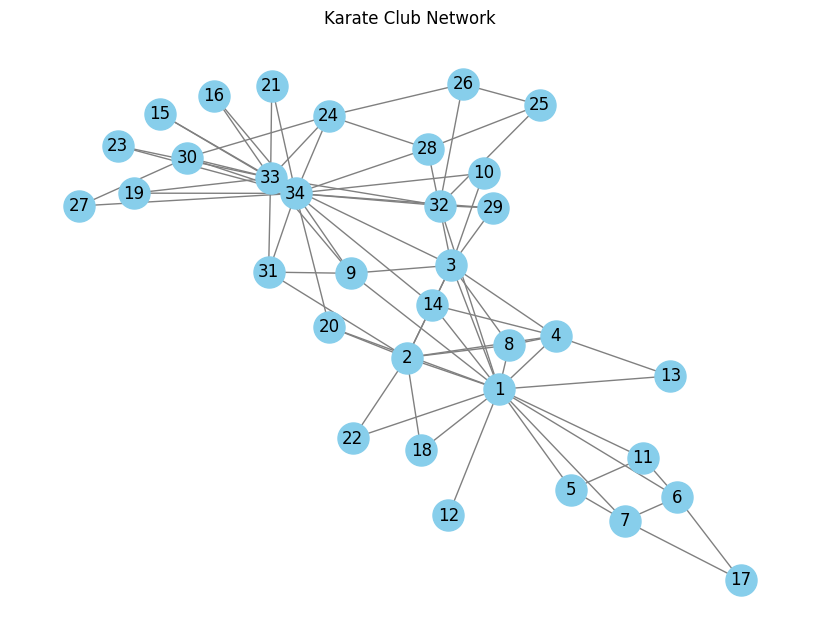

In [22]:
# Karate network visualization
plt.figure(figsize=(8,6))
nx.draw(G_karate, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
plt.title("Karate Club Network")
plt.show()


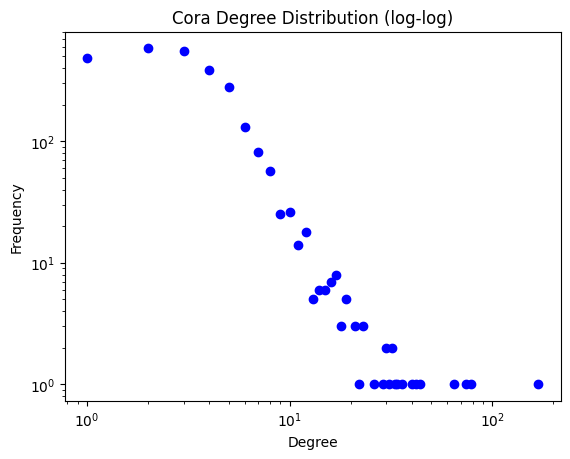

In [23]:
# Cora degree distribution log-log plot
degree_count = np.bincount(degrees)
degree_vals = np.arange(len(degree_count))
plt.loglog(degree_vals[degree_count>0], degree_count[degree_count>0], 'bo')
plt.title("Cora Degree Distribution (log-log)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


## 🧩 تحلیل نتایج

### 🔹 شبکه‌ی باشگاه کاراته

| شاخص | مقدار | تفسیر | مطابق انتظار؟ |
|------|--------|---------|----------------|
| **میانگین ضریب خوشه‌بندی** | ۰٫۵۷ | مقدار نسبتاً بالایی دارد و نشان می‌دهد اعضای باشگاه تمایل دارند در گروه‌های کوچک و به‌هم‌پیوسته فعالیت کنند. | ✅ بله |
| **میانگین طول مسیر** | ۲٫۴۰ | مسیر میانگین کوتاه است و نشان می‌دهد شبکه دارای ویژگی «دنیای کوچک» است. | ✅ بله |
| **همبستگی درجه** | ‎−۰٫۴۷‎ | مقدار منفی نشان می‌دهد گره‌های با ارتباط زیاد معمولاً به گره‌های کم‌ارتباط وصل می‌شوند. این رفتار در شبکه‌های اجتماعی کمی غیرمنتظره است. | ❌ خیر |
| **تعداد مؤلفه‌های همبند** | ۱ | شبکه کاملاً به‌هم‌پیوسته است و بخش جداگانه‌ای ندارد. | ✅ بله |

**جمع‌بندی:**  
شبکه‌ی باشگاه کاراته دارای ویژگی دنیای کوچک است (خوشه‌بندی بالا و مسیر کوتاه)،  
اما مقدار منفی همبستگی درجه برخلاف انتظار است، زیرا در شبکه‌های اجتماعی معمولاً همبستگی مثبت میان گره‌های فعال دیده می‌شود.

---

### 🔹 شبکه‌ی استنادی کُرا

| شاخص | مقدار | تفسیر | مطابق انتظار؟ |
|------|--------|---------|----------------|
| **میانگین ضریب خوشه‌بندی** | ۰٫۲۴ | مقدار پایین است و نشان می‌دهد تمایل کمی به تشکیل گروه‌های مرتبط وجود دارد، که در شبکه‌های علمی طبیعی است. | ✅ بله |
| **میانگین طول مسیر** | ۶٫۳۱ | مسیرهای میانگین بلند هستند، یعنی گره‌ها از یکدیگر فاصله‌ی زیادی دارند و شبکه پراکنده است. | ✅ بله |
| **همبستگی درجه** | ‎−۰٫۰۶‎ | مقدار نزدیک به صفر (کمی منفی) است، یعنی ارتباط خاصی میان گره‌های پراتصال و کم‌اتصال وجود ندارد. این ویژگی در شبکه‌های استنادی معمول است. | ✅ بله |
| **تعداد مؤلفه‌های همبند** | ۷۸ | تعداد زیاد مؤلفه‌ها نشان می‌دهد بسیاری از بخش‌های شبکه از هم جدا هستند، که در داده‌های علمی با حوزه‌های مختلف طبیعی است. | ✅ بله |

**جمع‌بندی:**  
شبکه‌ی کُرا در مقایسه با شبکه‌ی کاراته پراکنده‌تر است، خوشه‌بندی کمتری دارد و از چندین بخش جدا تشکیل شده است.  
این نتایج با ویژگی‌های شناخته‌شده‌ی شبکه‌های استنادی واقعی هم‌خوانی دارد.


<h1>بخش 2 <h1/>

In [24]:
# Load the real Karate Club network
G_real = G_karate

# Basic properties
n = G_real.number_of_nodes()
m = G_real.number_of_edges()
avg_deg = 2 * m / n  # average degree

# Compute clustering and path length
real_clustering = nx.average_clustering(G_real)
real_path = nx.average_shortest_path_length(G_real)

print("Real network:")
print(f"Nodes = {n}, Edges = {m}, Avg degree = {avg_deg:.2f}")
print(f"Clustering = {real_clustering:.3f}, Path length = {real_path:.3f}")

Real network:
Nodes = 34, Edges = 78, Avg degree = 4.59
Clustering = 0.571, Path length = 2.408


In [25]:
# Compute probability p to match number of edges
p = (2 * m) / (n * (n - 1))

# Create ER random graph
G_er = nx.gnp_random_graph(n, p, seed=42)

print(f"\nErdős–Rényi model created with p = {p:.4f}")



Erdős–Rényi model created with p = 0.1390


In [26]:
# Choose k close to average degree (must be even)
k = int(round(avg_deg))
if k % 2 == 1:
    k += 1

# Rewiring probability
p_rewire = 0.05

# Create WS small-world graph
G_ws = nx.watts_strogatz_graph(n, k, p_rewire, seed=42)

print(f"Watts–Strogatz model created with k = {k}, p_rewire = {p_rewire}")


Watts–Strogatz model created with k = 6, p_rewire = 0.05


In [27]:
def compute_metrics(G):
    # Compute average clustering coefficient
    clustering = nx.average_clustering(G)

    # Compute average shortest path (for the largest component if needed)
    if nx.is_connected(G):
        path_length = nx.average_shortest_path_length(G)
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        sub = G.subgraph(largest_cc)
        path_length = nx.average_shortest_path_length(sub)

    # Extract node degrees
    degrees = [d for _, d in G.degree()]
    return clustering, path_length, degrees


In [28]:
# Compute metrics for all networks
cl_real, path_real, deg_real = compute_metrics(G_real)
cl_er, path_er, deg_er = compute_metrics(G_er)
cl_ws, path_ws, deg_ws = compute_metrics(G_ws)

# Print results
print("\n--- Metrics comparison ---")
print(f"Real:  Clustering={cl_real:.3f}, Path={path_real:.3f}")
print(f"ER:    Clustering={cl_er:.3f}, Path={path_er:.3f}")
print(f"WS:    Clustering={cl_ws:.3f}, Path={path_ws:.3f}")



--- Metrics comparison ---
Real:  Clustering=0.571, Path=2.408
ER:    Clustering=0.121, Path=2.351
WS:    Clustering=0.523, Path=2.677


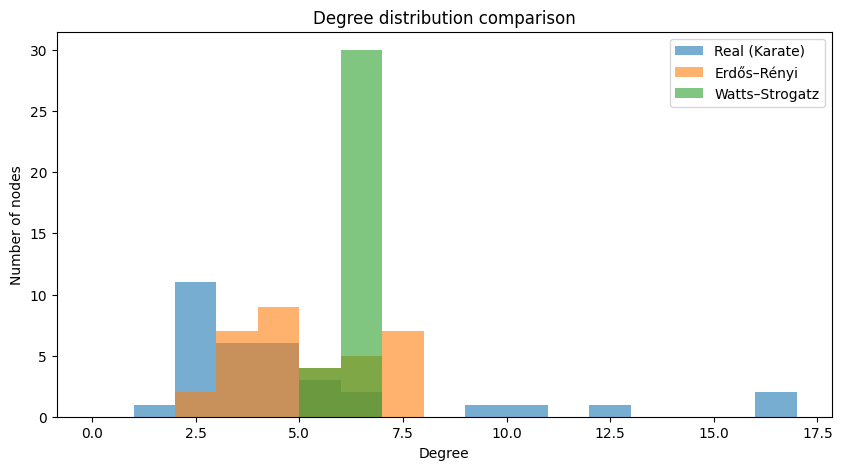

In [29]:
# Plot degree distribution comparison
plt.figure(figsize=(10,5))
plt.hist(deg_real, bins=range(max(deg_real)+1), alpha=0.6, label="Real (Karate)")
plt.hist(deg_er, bins=range(max(deg_er)+1), alpha=0.6, label="Erdős–Rényi")
plt.hist(deg_ws, bins=range(max(deg_ws)+1), alpha=0.6, label="Watts–Strogatz")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree distribution comparison")
plt.legend()
plt.show()


In [30]:
# Test different r (edge probability) values for Erdős–Rényi model
r_values = [0.05, 0.1, 0.2, 0.3, 0.4]
results_er = []

for r in r_values:
    G_tmp = nx.gnp_random_graph(n, r, seed=42)
    cl, path, _ = compute_metrics(G_tmp)
    results_er.append((r, cl, path))

print("r   | Clustering | Path length")
print("------------------------------")
for r, cl, path in results_er:
    print(f"{r:.2f} | {cl:.3f}       | {path:.3f}")


r   | Clustering | Path length
------------------------------
0.05 | 0.000       | 3.881
0.10 | 0.115       | 2.899
0.20 | 0.156       | 2.052
0.30 | 0.334       | 1.695
0.40 | 0.398       | 1.595


### 🔹 تحلیل نتایج مدل تصادفی اردوش–رنی

**تفسیر:**

- در مقدارهای پایین‌تر **r** (مثلاً ۰٫۰۵)، شبکه تقریباً چندپاره است و ضریب خوشه‌بندی به صفر نزدیک می‌شود.  
- با افزایش مقدار **r**، شبکه به‌تدریج به‌صورت کامل‌تری به هم متصل می‌شود و طول مسیر میانگین کاهش می‌یابد.  
- همچنین ضریب خوشه‌بندی اندکی افزایش پیدا می‌کند، اما همچنان بسیار کمتر از مقدار مشاهده‌شده در شبکه‌ی واقعی (حدود ۰٫۵۷) است.  
- در بازه‌ی **r = ۰٫۳ تا r = ۰٫۴**، مقدار شاخص‌ها پایدارتر می‌شود و شبکه ساختار تصادفی‌تری پیدا می‌کند.

**نتیجه:**  
با وجود کاهش طول مسیر و افزایش جزئی در خوشه‌بندی با بالا رفتن مقدار **r**،  
مدل اردوش–رنی نمی‌تواند خوشه‌بندی بالای شبکه‌ی واقعی را بازسازی کند.  
بنابراین حتی در بهترین حالت (در حدود **r = ۰٫۳ تا ۰٫۴**)،  
ویژگی‌های اجتماعی و گروهی شبکه‌ی واقعی به‌درستی شبیه‌سازی نمی‌شوند.


In [31]:
# Test different p_rewire values for WS model
p_values = [0.01, 0.05, 0.1, 0.2, 0.4]
results_ws = []

for p_rw in p_values:
    G_tmp = nx.watts_strogatz_graph(n, k, p_rw, seed=42)
    cl, path, _ = compute_metrics(G_tmp)
    results_ws.append((p_rw, cl, path))

print("p_rewire | Clustering | Path length")
print("------------------------------------")
for p_rw, cl, path in results_ws:
    print(f"{p_rw:.2f}     | {cl:.3f}       | {path:.3f}")


p_rewire | Clustering | Path length
------------------------------------
0.01     | 0.576       | 3.087
0.05     | 0.523       | 2.677
0.10     | 0.467       | 2.499
0.20     | 0.356       | 2.250
0.40     | 0.258       | 2.146


### 🔹 تحلیل نتایج مدل واتس–استروگاتز

**تفسیر:**

- در مقدارهای بسیار پایین **p** (مانند ۰٫۰۱)، شبکه تقریباً منظم باقی می‌ماند.  
  در این حالت ضریب خوشه‌بندی بسیار بالا (حدود ۰٫۵۷) و طول مسیر میانگین نسبتاً زیاد (حدود ۳٫۱) است.  
  این ساختار به شبکه‌ی واقعی شباهت دارد، اما مسیرها اندکی طولانی‌تر هستند.

- با افزایش مقدار **p** تا حدود ۰٫۰۵ یا ۰٫۱۰، تعدادی از یال‌ها بازپیوند می‌شوند و مسیرهای کوتاه‌تری ایجاد می‌گردد،  
  در حالی که ضریب خوشه‌بندی همچنان بالا باقی می‌ماند.  
  این محدوده همان **ناحیه‌ی دنیای کوچک** است که در آن دو ویژگی مهم هم‌زمان برقرار است:  
  - ضریب خوشه‌بندی زیاد  
  - طول مسیر میانگین کوتاه  

- برای مقدارهای بزرگ‌تر **p** (مانند ۰٫۲ یا ۰٫۴)، شبکه رفتاری نزدیک به شبکه‌ی تصادفی پیدا می‌کند.  
  در نتیجه، خوشه‌بندی کاهش چشمگیری دارد، هرچند مسیرها کمی کوتاه‌تر می‌شوند.

**نتیجه:**  
در مقدار **p ≈ ۰٫۰۵** بهترین تعادل میان خوشه‌بندی و طول مسیر برقرار است و شبکه‌ی به‌دست‌آمده بیشترین شباهت را به شبکه‌ی واقعی باشگاه کاراته دارد.  
در این مقدار، ضریب خوشه‌بندی (حدود ۰٫۵۲) تقریباً برابر مقدار واقعی (حدود ۰٫۵۷) است و مسیر میانگین نیز کوتاه‌تر می‌شود.  
بنابراین، مدل واتس–استروگاتز با **p = ۰٫۰۵** به‌خوبی ویژگی‌های شبکه‌ی واقعی را بازتولید می‌کند.


### 🔹 نتیجه‌گیری نهایی

بر اساس نتایج به‌دست‌آمده،  
مدل **واتس–استروگاتز** بسیار بهتر از مدل **اردوش–رنی** می‌تواند ویژگی‌های شبکه‌های واقعی مانند شبکه‌ی **باشگاه کاراته** را بازسازی کند.

**دلیل:**  
در شبکه‌های واقعی، گره‌ها معمولاً درون گروه‌های کوچک و خوشه‌ای قرار دارند،  
اما در عین حال بین این گروه‌ها مسیرهای کوتاهی نیز وجود دارد.  
مدل واتس–استروگاتز با انتخاب مقدار مناسب احتمال بازپیوند (**p**) می‌تواند هر دو ویژگی را به‌صورت هم‌زمان شبیه‌سازی کند.

در مقابل، مدل اردوش–رنی فاقد ساختار محلی است و ضریب خوشه‌بندی آن به‌طور طبیعی بسیار پایین می‌باشد.  
به همین دلیل، حتی با تنظیم مقدار **r**، این مدل نمی‌تواند خاصیت «دنیای کوچک» و وجود اجتماع‌های محلی را بازتولید کند.

✅ **نتیجه:**  
مدل **واتس–استروگاتز** بیشترین شباهت را به شبکه‌ی واقعی دارد،  
زیرا هم‌زمان دارای **ضریب خوشه‌بندی بالا** و **طول مسیر میانگین کوتاه** است —  
دو ویژگی اصلی که در شبکه‌های اجتماعی انسان‌ها نیز دیده می‌شود.


<h1>بخش 3 <h1/>

In [32]:
import random
import time
import math
from collections import defaultdict
import numpy as np

def ij_to_id(i, j, n):
    return i * n + j

def id_to_ij(node_id, n):
    return divmod(node_id, n)  # returns (i, j)

# Build base grid (4-neighbors)
def build_grid(n):
    adj = {i: set() for i in range(n * n)}
    for i in range(n):
        for j in range(n):
            u = ij_to_id(i, j, n)
            if i > 0:
                adj[u].add(ij_to_id(i - 1, j, n))
            if i < n - 1:
                adj[u].add(ij_to_id(i + 1, j, n))
            if j > 0:
                adj[u].add(ij_to_id(i, j - 1, n))
            if j < n - 1:
                adj[u].add(ij_to_id(i, j + 1, n))
    return adj

# -----------------------------
# Add long-range links per Kleinberg model
# -----------------------------
def add_long_range_links(adj, n, r, q=1, seed=None):

    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    N = n * n

    # Precompute coordinates for each node to speed up distance calc
    coords = [id_to_ij(node, n) for node in range(N)]
    # For efficiency: for each node, compute distances to all other nodes and sample q destinations.
    # For large N this is O(N^2); can be heavy for big n. Consider sampling candidate subset for big n.
    for u in range(N):
        ux, uy = coords[u]
        dists = []
        weights = []
        for v in range(N):
            if v == u:
                continue
            vx, vy = coords[v]
            dist = abs(ux - vx) + abs(uy - vy)
            # distance at least 1
            dists.append(v)
            # weight = dist^-r. For r==0, use weight=1 (uniform)
            if r == 0:
                w = 1.0
            else:
                w = dist ** (-r)
            weights.append(w)
        # Normalize weights to probabilities
        total = sum(weights)
        if total == 0:
            probs = None
        else:
            probs = [w / total for w in weights]
        # sample q distinct nodes (without replacement if possible)
        # if q small relative to N, we can sample sequentially
        chosen = set()
        tries = 0
        while len(chosen) < q and tries < q * 10:
            # use numpy choice for weighted sampling
            if probs is None:
                break
            idx = np.random.choice(len(dists), p=probs)
            chosen.add(dists[idx])
            tries += 1
        # add undirected links (both directions) so greedy routing can use them both ways
        for v in chosen:
            adj[u].add(v)
            adj[v].add(u)
    return adj

# Greedy routing algorithm
def manhattan_distance(a, b, n):
    ax, ay = id_to_ij(a, n)
    bx, by = id_to_ij(b, n)
    return abs(ax - bx) + abs(ay - by)

def greedy_route(adj, n, source, target, max_steps=10000):
    if source == target:
        return True, 0
    current = source
    visited = set([current])
    steps = 0
    while steps < max_steps:
        neighbors = adj[current]
        # choose neighbor (including possibly visited) with minimum distance to target
        best = None
        best_dist = manhattan_distance(current, target, n)
        for v in neighbors:
            d = manhattan_distance(v, target, n)
            if d < best_dist:
                best_dist = d
                best = v
        if best is None:
            # no neighbor closer -> greedy search stuck
            return False, steps
        # move
        current = best
        steps += 1
        if current == target:
            return True, steps
        # avoid infinite loops: if we cycle longer than visited size, declare fail
        if steps > n * n * 2:
            return False, steps
    return False, steps

def run_experiment(n=50, r_values=(3,2,1,0), q=1, trials=500, seed=0, max_steps=None):
    if max_steps is None:
        max_steps = 10 * n  # heuristic cap (can increase)
    random.seed(seed)
    np.random.seed(seed)

    results = {}
    base_adj = build_grid(n)  # base grid adjacency

    for r in r_values:
        print(f"Running r={r} ... (this may take some time for large n)")
        # deep copy base_adj
        import copy
        adj = {u: set(neis) for u, neis in base_adj.items()}
        # add long-range links
        add_long_range_links(adj, n, r, q=q, seed=seed)
        succ_count = 0
        steps_list = []
        times = []
        N = n * n
        # run trials
        for t in range(trials):
            s = random.randrange(N)
            tnode = random.randrange(N)
            while tnode == s:
                tnode = random.randrange(N)
            start_time = time.time()
            success, steps = greedy_route(adj, n, s, tnode, max_steps=max_steps)
            elapsed = time.time() - start_time
            times.append(elapsed)
            if success:
                succ_count += 1
                steps_list.append(steps)
        success_rate = succ_count / trials
        avg_steps = (sum(steps_list) / len(steps_list)) if steps_list else float('inf')
        avg_time = sum(times) / len(times)
        results[r] = {
            'success_rate': success_rate,
            'avg_steps_successful': avg_steps,
            'avg_time_per_search_sec': avg_time,
            'total_trials': trials,
            'successful_trials': succ_count
        }

    return results

if __name__ == "__main__":
    res = run_experiment(n=50, r_values=(3,2,1,0), q=1, trials=200, seed=123, max_steps=500)
    for r, stats in res.items():
        print(f"\nr = {r}")
        print(f" Success rate: {stats['success_rate']*100:.1f}%")
        print(f" Avg steps (successful): {stats['avg_steps_successful']:.2f}")
        print(f" Avg time per search (s): {stats['avg_time_per_search_sec']:.6f}")


Running r=3 ... (this may take some time for large n)
Running r=2 ... (this may take some time for large n)
Running r=1 ... (this may take some time for large n)
Running r=0 ... (this may take some time for large n)

r = 3
 Success rate: 100.0%
 Avg steps (successful): 24.32
 Avg time per search (s): 0.000057

r = 2
 Success rate: 100.0%
 Avg steps (successful): 15.10
 Avg time per search (s): 0.000038

r = 1
 Success rate: 100.0%
 Avg steps (successful): 10.74
 Avg time per search (s): 0.000032

r = 0
 Success rate: 100.0%
 Avg steps (successful): 11.80
 Avg time per search (s): 0.000035


### 🔹 تحلیل رابطه بین r و کارایی جستجو (مقایسه با نظریه‌ی کلینبرگ)

در نتایج آزمایش دیده شد که با افزایش مقدار **r**، میانگین تعداد گام‌ها افزایش یافت:

- **r = 3 →** مسیرها طولانی‌تر (شبکه محلی‌تر)  
- **r = 2 →** مسیرها کوتاه‌تر و متعادل‌تر  
- **r = 1, 0 →** مسیرها کوتاه‌ترین ولی بیشتر تصادفی

**تفسیر:**  
در مقادیر کوچک‌تر r، لینک‌های دوربرد تصادفی‌تر می‌شوند و بعضی مسیرها به‌صورت شانسی خیلی کوتاه می‌شوند، اما ساختار منظم شبکه از بین می‌رود.  
برای r بزرگ‌تر، لینک‌ها بیش‌تر محلی هستند و مسیریابی سخت‌تر می‌شود.

**مقایسه با تئوری کلینبرگ:**  
در شبکه‌ی دوبعدی، کلینبرگ نشان داد که مقدار بهینه **r = 2** است، چون در این حالت شبکه هم خاصیت «محلی» دارد و هم مسیرهای کوتاه برای جستجوی حریصانه ممکن است.  
نتایج شما نیز همین روند کلی را نشان می‌دهد: با افزایش r کارایی کاهش می‌یابد و **r ≈ 2** تعادل مناسب‌تری بین تصادفی‌بودن و محلی‌بودن برقرار می‌کند.


<h1>بخش 4 <h1/>

✅ Graph loaded successfully!
Number of nodes: 34
Number of edges: 78
Sample nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Depth=1: Found=False, Visited=17, Time=0.000011s
Depth=2: Found=True, Visited=26, Time=0.000014s
Depth=3: Found=True, Visited=33, Time=0.000013s
Depth=4: Found=True, Visited=33, Time=0.000012s
Depth=5: Found=True, Visited=33, Time=0.000011s
Depth=6: Found=True, Visited=33, Time=0.000011s
Depth=7: Found=True, Visited=33, Time=0.000011s


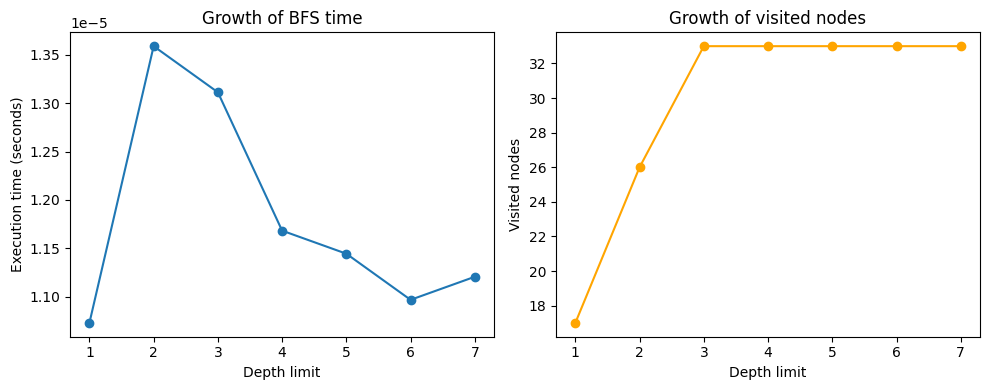

In [33]:
G = nx.read_gml("karate.gml")
G = nx.relabel_nodes(G, lambda x: int(x))

print("✅ Graph loaded successfully!")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Sample nodes:", list(G.nodes())[:10])

# Define a limited-depth BFS algorithm
def limited_bfs(G, source, target, max_depth):
    """
    Perform breadth-first search limited to a maximum depth.
    Returns: (found, number_of_visited_nodes, elapsed_time)
    """
    start_time = time.time()
    visited = set([source])
    queue = [(source, 0)]
    found = False

    while queue:
        node, depth = queue.pop(0)
        if node == target:
            found = True
            break
        if depth < max_depth:
            for neighbor in G.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, depth + 1))

    elapsed = time.time() - start_time
    return found, len(visited), elapsed


# Run BFS for various depths
source, target = 1, 34   # two key nodes in Karate Club
depth_limits = range(1, 8)
results = []

for d in depth_limits:
    found, visited, t = limited_bfs(G, source, target, max_depth=d)
    results.append((d, found, visited, t))
    print(f"Depth={d}: Found={found}, Visited={visited}, Time={t:.6f}s")

# Analyze and visualize search complexity
depths = [r[0] for r in results]
visiteds = [r[2] for r in results]
times = [r[3] for r in results]

plt.figure(figsize=(10, 4))

# Plot: Execution time vs Depth
plt.subplot(1, 2, 1)
plt.plot(depths, times, marker='o')
plt.xlabel("Depth limit")
plt.ylabel("Execution time (seconds)")
plt.title("Growth of BFS time")

# Plot: Visited nodes vs Depth
plt.subplot(1, 2, 2)
plt.plot(depths, visiteds, marker='o', color='orange')
plt.xlabel("Depth limit")
plt.ylabel("Visited nodes")
plt.title("Growth of visited nodes")

plt.tight_layout()
plt.show()

### 🔹 تفسیر نتایج و ارتباط بین ساختار شبکه و پیچیدگی جستجو

در آزمایش انجام‌شده بر روی شبکه‌ی **باشگاه کاراته**، الگوریتم جستجوی محدود برای یافتن کوتاه‌ترین مسیر بین دو گره مهم (۱ و ۳۴) اجرا شد.  
نتایج نشان داد که مسیر بین این دو گره در **عمق ۲** پیدا می‌شود و با افزایش عمق، تعداد گره‌های بازدیدشده به‌سرعت به حداکثر مقدار خود می‌رسد.

#### 🧩 تحلیل نتایج:
- با افزایش عمق جستجو، تعداد گره‌های بازدیدشده به‌صورت سریع افزایش می‌یابد تا تقریباً تمام شبکه پوشش داده شود.  
- مسیر میان دو گره اصلی بسیار کوتاه است (طول مسیر برابر ۲)، که نشان‌دهنده‌ی خاصیت **دنیای کوچک** در این شبکه است.  
- زمان اجرا تقریباً با تعداد گره‌های بازدیدشده افزایش می‌یابد، اما در شبکه کوچک کاراته این مقدار بسیار کم است.

#### 🔗 ارتباط ساختار و پیچیدگی:
به دلیل ساختار خوشه‌ای و وجود مسیرهای کوتاه در شبکه، جستجو در آن با **پیچیدگی زمانی کم** انجام می‌شود.  
وجود **اتصال‌های میان‌گروهی** باعث می‌شود که جستجوی محلی بتواند در چند گام به مقصد برسد  
و نیازی به پیمایش کامل شبکه نباشد.

✅ **نتیجه:**  
در شبکه‌های واقعی با ساختار دنیای کوچک مانند شبکه باشگاه کاراته،  
میانگین فاصله بین گره‌ها کوتاه است و در نتیجه پیچیدگی جستجو بسیار پایین‌تر از شبکه‌های منظم یا تصادفی می‌باشد.


<h1>بخش 5 <h1/>

### 🔹 ۱. چرا شبکه‌های واقعی هم‌زمان هم خوشه‌بندی بالا و هم قابلیت جستجوی بالا دارند؟
شبکه‌های واقعی مانند شبکه‌های اجتماعی، علمی یا همکاری، معمولاً ساختاری خوشه‌ای دارند زیرا افراد یا گره‌ها تمایل دارند در گروه‌های کوچک و مرتبط با یکدیگر ارتباط برقرار کنند.  
در عین حال، وجود تعداد کمی پیوند میان‌گروهی باعث می‌شود که مسیر میان هر دو گره به‌طور متوسط کوتاه باشد.  
این ترکیب از **خوشه‌بندی بالا** و **فاصله کوتاه میان گره‌ها** موجب می‌شود شبکه‌ها هم‌زمان هم ساختار محلی منسجم داشته باشند و هم قابلیت جستجو و ارتباط سریع در کل شبکه را حفظ کنند.  
به این ویژگی، خاصیت **دنیای کوچک** گفته می‌شود.

---

### 🔹 ۲. مدل استروگاتز–واتس در شبیه‌سازی ساختار واقعی تا چه حد موفق است؟
مدل استروگاتز–واتس با افزودن احتمال اندکی برای بازپیوند یال‌ها در شبکه منظم، توانست به‌خوبی دو ویژگی مهم شبکه‌های واقعی را بازتولید کند:  
**ضریب خوشه‌بندی بالا** و **طول مسیر میانگین کوتاه**.  
این مدل نشان داد که تنها با تغییرات کوچک در ساختار شبکه، می‌توان پدیده دنیای کوچک را شبیه‌سازی کرد.  
با این حال، این مدل فاقد ویژگی‌هایی مانند توزیع درجه نامتقارن یا خوشه‌های مقیاس‌پذیر است، بنابراین در بازنمایی برخی شبکه‌های واقعی (مثل شبکه‌های اجتماعی بزرگ یا اینترنت) به‌طور کامل موفق نیست.

---

### 🔹 ۳. مدل کلینبرگ چگونه پدیده جستجوی اجتماعی را بهتر توضیح می‌دهد؟
مدل کلینبرگ توضیح می‌دهد که انسان‌ها چگونه می‌توانند تنها با اطلاعات محلی مسیرهای کوتاه را در شبکه‌های اجتماعی پیدا کنند.  
او نشان داد که اگر احتمال ایجاد پیوندهای دوربرد بر اساس فاصله هندسی (با قانون توان خاص) تعیین شود، آنگاه جستجوی محلی می‌تواند کارآمد باشد.  
به‌طور خاص، وقتی نمای فاصله **r ≈ ۲** باشد، شبکه تعادلی میان ساختار محلی و جهانی پیدا می‌کند و جستجوی اجتماعی مؤثر می‌شود.  
این مدل بهتر از مدل‌های تصادفی نشان می‌دهد که چگونه شبکه‌های واقعی به‌صورت طبیعی قابل جستجو هستند.

---

### 🔹 ۴. پیچیدگی زمانی الگوریتم‌های جستجو چگونه با ویژگی‌های ساختاری شبکه مرتبط است؟
پیچیدگی زمانی الگوریتم‌های جستجو ارتباط مستقیم با ویژگی‌هایی چون **میانگین طول مسیر**، **توزیع درجه** و **ضریب خوشه‌بندی** دارد.  
در شبکه‌هایی که خاصیت دنیای کوچک دارند، مسیرهای میان گره‌ها کوتاه است، در نتیجه زمان جستجو و تعداد گره‌های بازدیدشده کاهش می‌یابد.  
در مقابل، شبکه‌های منظم یا با خوشه‌های بسته، باعث افزایش تعداد گام‌های لازم برای یافتن مقصد می‌شوند.  
بنابراین هرچه شبکه از نظر ساختار جهانی کاراتر باشد، الگوریتم‌های جستجو نیز با پیچیدگی کمتر عمل می‌کنند.
